In [184]:
import pandas as pd
data = pd.read_csv('./data/all_data.csv', encoding='utf-8')
data

low = data.loc[:,'ADQ1':]

def not_star(x):
    if x == "*":
        x = 0
    return x
low = low.applymap(not_star)

low = low[low['y'] != 0]
low = low[low['ADQ2'] != 0]
# low['y'].astype('category')

new_data = pd.DataFrame()

new_data['컴퓨터_보유'] = low['Q1A1'].replace(2,0)
new_data['노트북_보유'] = low['Q1A2'].replace(2,0)
new_data['휴대폰1_보유'] = low['Q2A11'].replace(3,0)
new_data['휴대폰2_보유'] = low['Q2A12'].replace(3,0)
new_data['스마트패드_보유'] = low['Q2A2'].replace(2,0)
new_data['스마트_주변기기_보유'] = low['Q2A3'].replace(2,0)
new_data['인터넷이용'] = low['Q3'].replace(2,0)
new_data = pd.concat([new_data,low.loc[:,'Q']])





new_data['연령'] = low['ADQ1']
new_data['성별'] = low['ADQ2']
# new_data['직업1'] = low['ADQ3'] #onehot
# new_data['직업2'] = low['ADQ3A']
new_data['학력'] = low['ADQ4']
new_data['장애여부'] = low['ADQ5']
new_data['가구주'] = low['ADQ6'].replace([1,2],[0,1])
new_data['가구거주'] = low['ADQ7']
new_data['가구구성형태'] = low['ADQ8'].replace([1,2],[0,1])
new_data['시군'] = low['ADQ102'].replace([1,2],[0,1])
new_data['동읍면'] = low['ADQ103'].replace([1,2],[0,1])
#  ['직업1','직업2','가구거주']
one_hot_columns = ['가구거주']
new_data['y'] = low['y']




In [185]:
#XGboost
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
lbl =LabelEncoder()
new_data['성별'] = lbl.fit_transform(new_data['성별'].astype(str))
new_data['시군'] = lbl.fit_transform(new_data['시군'].astype(str))
# new_data['직업1'] = lbl.fit_transform(new_data['직업1'].astype(str))

<AxesSubplot:xlabel='y', ylabel='count'>

C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


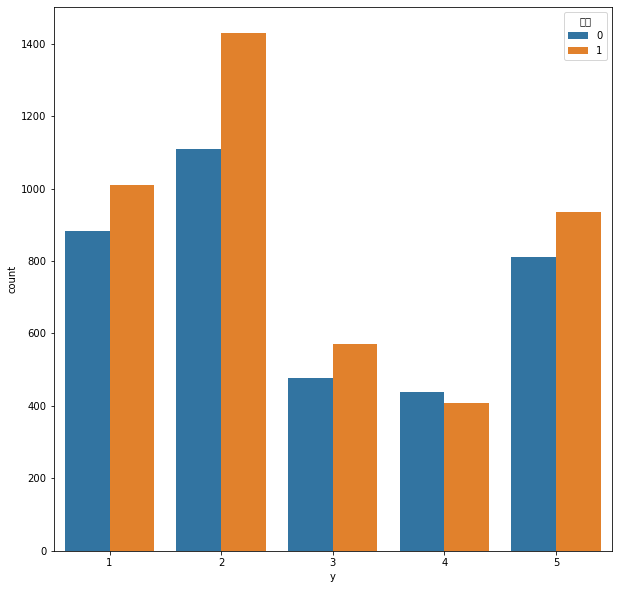

In [203]:
import matplotlib.pyplot as plt
new_data_male = new_data[new_data['성별'] == 0]
new_data_female = new_data[new_data['성별'] == 1]

plt.figure(figsize = (10,10))
sns.countplot(x= 'y', hue = '성별' ,data=new_data)


55 90


C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)


연령        3064
성별        3064
학력        3064
장애여부      3064
가구주       3064
가구거주      3064
가구구성형태    3064
시군        3064
동읍면       3064
y         3064
dtype: int64

<Figure size 720x720 with 0 Axes>

C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0, flags=flags)


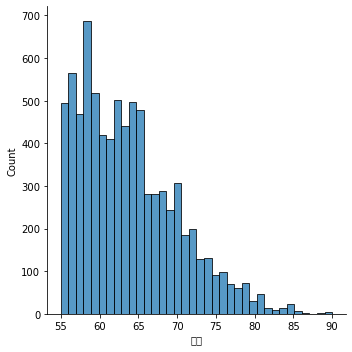

In [217]:
plt.figure(figsize = (10,10))
sns.displot(new_data['연령'])
print(new_data['연령'].min(),new_data['연령'].max())
new_data[new_data['연령'] >= 65 ].count()

In [181]:
new_data = pd.get_dummies(new_data,columns = one_hot_columns)

In [154]:
# # 중복행 삭제
# print(new_data['y'].value_counts())
# new_data = new_data.drop_duplicates()
# new_data['y'].value_counts()

In [155]:
#모델 분리
feature_columns = new_data.columns.difference(["y"]) # new_y를 제외한 모든 행
X = new_data[feature_columns]
y = new_data['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42,stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7262, 12) (807, 12) (7262,) (807,)


In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred))

accuracy: 0.35811648079306074


C:\Users\wodud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [157]:
import numpy as np
from sklearn import neighbors,datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

clf = neighbors.KNeighborsClassifier(5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred))

accuracy: 0.3420074349442379


In [158]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#비선형 SVM 분류모델을 학습하고 평가
svm = SVC(kernel = 'rbf', C=10.0, random_state = 0, gamma = 0.1)
svm.fit(X_train, y_train)
y_pred_ksvc = svm.predict(X_test)
print('Accuracy %.2f' % accuracy_score(y_test, y_pred_ksvc))

#Confusion Matrix
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred_ksvc)
print(confmat)

Accuracy 0.35
[[ 52 104   4   5  24]
 [ 47 169   5   8  25]
 [ 28  57   1   2  17]
 [ 17  51   2   3  11]
 [ 26  79   3   6  61]]


In [159]:
#랜덤 포레스트 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators = 500 ,max_depth = 30, random_state = 42 ) # 시드값 고정
model1 = forest.fit(X_train, y_train) # 학습 진행

predict_train = model1.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = model1.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")



Accuracy: 62.90 %
Accuracy: 36.93 %


[('연령', 0.4620757383282256),
 ('시군', 0.2975946792448877),
 ('학력', 0.08302108283471124),
 ('동읍면', 0.03412561246666761),
 ('성별', 0.023072847564472882),
 ('가구구성형태', 0.018157563986191894),
 ('가구주', 0.017868012890028397),
 ('가구거주_1', 0.017014390246529572),
 ('가구거주_2', 0.016290801634967423),
 ('장애여부', 0.014590698994782407),
 ('가구거주_3', 0.012695423284086502),
 ('가구거주_4', 0.003493148524448692)]

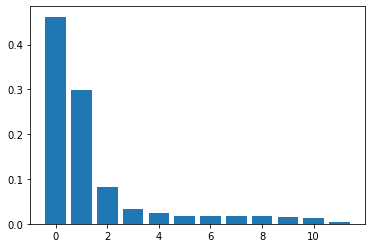

In [160]:
# 학습한 모델의 피쳐 중요도 그래프로 살펴봅니다
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])

#학습한 모델의 피쳐 중요도 출력합니다
feat_labels =X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
#forest.feature_importances_로 순서를 맞춰 보여줘라
sorted(feature, key = lambda tup: tup[1], reverse = True)

In [177]:
old = new_data.groupby(['성별','y']).count()
old

연령    학력  장애여부   가구주  가구구성형태    시군   동읍면  가구거주_1  가구거주_2  가구거주_3  \
성별 y                                                                       
0  1   882   882   882   882     882   882   882     882     882     882   
   2  1110  1110  1110  1110    1110  1110  1110    1110    1110    1110   
   3   477   477   477   477     477   477   477     477     477     477   
   4   437   437   437   437     437   437   437     437     437     437   
   5   810   810   810   810     810   810   810     810     810     810   
1  1  1010  1010  1010  1010    1010  1010  1010    1010    1010    1010   
   2  1429  1429  1429  1429    1429  1429  1429    1429    1429    1429   
   3   570   570   570   570     570   570   570     570     570     570   
   4   408   408   408   408     408   408   408     408     408     408   
   5   936   936   936   936     936   936   936     936     936     936   

      가구거주_4  
성별 y          
0  1     882  
   2    1110  
   3     477  
   4     437  
   5     810  
1  1    1010  
   2    1429  
   3     570  
   4     408  
   5     936

In [161]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(forest, random_state =1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names = X_test.columns.tolist())

Weight,Feature
0.0976 ± 0.0180,연령
0.0791 ± 0.0320,시군
0.0387 ± 0.0131,학력
0.0258 ± 0.0092,동읍면
0.0121 ± 0.0139,가구주
0.0099 ± 0.0089,가구구성형태
0.0087 ± 0.0089,가구거주_2
0.0074 ± 0.0107,가구거주_3
0.0057 ± 0.0081,성별
-0.0002 ± 0.0019,가구거주_4


In [162]:
#XGboost
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(random_state = 0, n_estimator = 100, max_depth = 7, subsample = 0.8,gamma = 0.1).fit(X_train, y_train)

predict_train = xgb.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = xgb.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")


C:\Users\wodud\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 59.13 %
Accuracy: 37.79 %


In [209]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb, random_state =1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names = X_test.columns.tolist())

Weight,Feature
0.0989 ± 0.0199,연령
0.0803 ± 0.0100,시군
0.0379 ± 0.0169,가구주
0.0317 ± 0.0158,학력
0.0134 ± 0.0112,가구거주_1
0.0121 ± 0.0040,가구구성형태
0.0104 ± 0.0117,가구거주_3
0.0094 ± 0.0058,가구거주_2
0.0052 ± 0.0245,성별
0.0045 ± 0.0108,동읍면


In [213]:
from catboost import CatBoostClassifier
from sklearn import metrics
cb = CatBoostClassifier(silent=True, random_state = 0, n_estimators=300).fit(X_train, y_train)

print('train accuracy: ', metrics.accuracy_score(y_train, cb.predict(X_train)))
print('test accuracy: ', metrics.accuracy_score(y_test,cb.predict(X_test)))

train accuracy:  0.5254750757367116
test accuracy:  0.37670384138785623


In [214]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(cb, random_state =1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names = X_test.columns.tolist())

Weight,Feature
0.0887 ± 0.0280,연령
0.0568 ± 0.0182,시군
0.0401 ± 0.0091,학력
0.0369 ± 0.0160,가구주
0.0183 ± 0.0133,가구거주_3
0.0136 ± 0.0075,가구거주_2
0.0099 ± 0.0209,성별
0.0094 ± 0.0142,동읍면
0.0089 ± 0.0036,가구구성형태
0.0032 ± 0.0049,장애여부


In [163]:
abs(new_data.corr(method = 'spearman')["y"]).sort_values(ascending = False)[:30]

y         1.000000
연령        0.110647
가구구성형태    0.051790
가구거주_4    0.031807
가구주       0.030740
가구거주_3    0.027040
시군        0.019689
성별        0.013415
가구거주_1    0.013223
가구거주_2    0.010985
동읍면       0.010783
학력        0.008806
장애여부      0.001315
Name: y, dtype: float64

In [164]:
abs(new_data.corr(method = 'pearson')["y"]).sort_values(ascending = False)[:30]

y         1.000000
연령        0.171678
가구구성형태    0.058901
가구주       0.035533
가구거주_4    0.032824
가구거주_3    0.029140
학력        0.026824
시군        0.017662
성별        0.016505
가구거주_2    0.013828
가구거주_1    0.011966
동읍면       0.009759
장애여부      0.000444
Name: y, dtype: float64

## All_data

In [75]:
import pandas as pd

data = pd.read_csv('./data/all_data_final.csv', encoding='utf-8')
data = data[data['연령'] >= 65]
def old_range(x):
    if 65 <= x <70:
        return 1
    elif 70 <= x <75:
        return 2
    elif 75 <= x <80:
        return 3
    elif 80 <= x <85:
        return 4
    elif 85 <= x :
        return 5
del data['Unnamed: 0']
data_old_range = data.copy()
data_old_range['연령'] = data['연령'].apply(lambda x : old_range(x))


C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0, flags=flags)


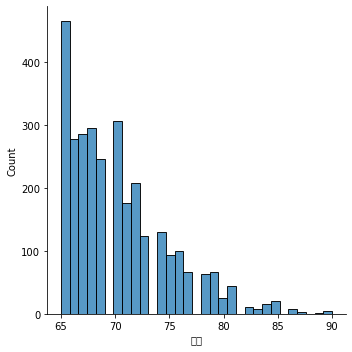

In [65]:
sns.displot(data['연령'])

In [50]:
print(len(data))
data.columns


3039


Index(['연령', '시_1_군_0', '동_1_읍면_0', '성별', '장애판정', '가구월평균소득', '여가문화생활_만족도',
       '경제적_만족도', '건강상태_만족도', '전반적인삶_만족도', '직업_1', '직업_11', '직업_14', '직업_15',
       '직업_2', '직업_3', '직업_4', '직업_5', '직업_6', '직업_7', '직업_8', '직업_9',
       '광역시도_1', '광역시도_10', '광역시도_11', '광역시도_12', '광역시도_13', '광역시도_14',
       '광역시도_15', '광역시도_16', '광역시도_17', '광역시도_2', '광역시도_3', '광역시도_4', '광역시도_5',
       '광역시도_6', '광역시도_7', '광역시도_8', '광역시도_9', '가구거주형태_1', '가구거주형태_2',
       '가구거주형태_3', '가구거주형태_4', '최종학력_1', '최종학력_2', '최종학력_3', '최종학력_4',
       '온라인_교육_여부', 'pc_노트북_보유', '피처폰_보유', '스마트폰_태블릿PC_보유', '뉴스_날씨', '미디어콘텐츠',
       'SNS', '앱 검색 및 설치', '형제자매_존재', '부모_존재', '배우자_존재', '동거자녀_존재', 'new_y'],
      dtype='object')

In [665]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [719]:
input = Input(shape = (59,))

hidden = Dense(25, activation='relu')(input)

hidden = Dense(50, activation='relu')(hidden)

output = Dense(5, activation='softmax')(hidden)

model = Model(inputs=input, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00005), metrics=['acc'])

In [720]:
model.summary()

Model: "model_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 59)]              0         
_________________________________________________________________
dense_147 (Dense)            (None, 25)                1500      
_________________________________________________________________
dense_148 (Dense)            (None, 50)                1300      
_________________________________________________________________
dense_149 (Dense)            (None, 5)                 255       
Total params: 3,055
Trainable params: 3,055
Non-trainable params: 0
_________________________________________________________________


In [721]:

data = pd.read_csv('./data/all_data_final.csv', encoding='utf-8',index_col = 0)
# data = data[data['연령'] >= 65]
def old_range(x):
    if 65 <= x <70:
        return 65
    elif 70 <= x <75:
        return 70
    elif 75 <= x <80:
        return 75
    elif 80 <= x <85:
        return 80
    elif 85 <= x :
        return 85
    else:
        return 55
data_old_range = data.copy()
data_old_range['연령'] = data['연령'].apply(lambda x : old_range(x))



# 모델 분리
feature_columns = data_old_range.columns.difference(["new_y"]) # new_y를 제외한 모든 행
X = data_old_range[feature_columns].values
y = pd.get_dummies(data_old_range['new_y']).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6519, 59) (1630, 59) (6519, 5) (1630, 5)


(2198, 59) (550, 59) (2198, 5) (550, 5)


C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\wodud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0, flags=flags)


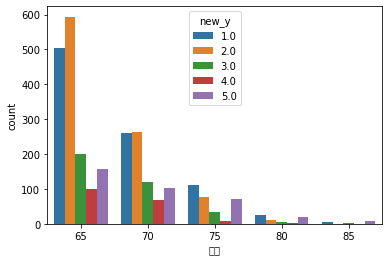

In [722]:
data = pd.read_csv('./data/all_data_final.csv', encoding='utf-8',index_col = 0)
data = data[data['연령'] >= 65]

def old_range(x):
    if 65 <= x <70:
        return 65
    elif 70 <= x <75:
        return 70
    elif 75 <= x <80:
        return 75
    elif 80 <= x <85:
        return 80
    elif 85 <= x :
        return 85
    else:
        return 55
data_old_range = data.copy()
data_old_range['연령'] = data['연령'].apply(lambda x : old_range(x))
import seaborn as sns
sns.countplot(x='연령', hue = 'new_y', data = data_old_range)
data_old_range['new_y'].value_counts()

# 모델 분리
feature_columns = data_old_range.columns.difference(["new_y"]) # new_y를 제외한 모든 행
X = data_old_range[feature_columns].values
y = pd.get_dummies(data_old_range['new_y']).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [727]:
input = Input(shape = (59,))


hidden = Dense(50, activation='relu')(input)

hidden = Dense(25, activation='relu')(hidden)

output = Dense(5, activation='softmax')(hidden)

model = Model(inputs=input, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.005), metrics=['acc'])


history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=30 # epochs 복수형으로 쓰기!
)

Epoch 1/30
69/69 [==============================] - 1s 4ms/step - loss: 1.7893 - acc: 0.3089 - val_loss: 1.5196 - val_acc: 0.3073
Epoch 2/30
69/69 [==============================] - 0s 3ms/step - loss: 1.5048 - acc: 0.3553 - val_loss: 1.4748 - val_acc: 0.3273
Epoch 3/30
69/69 [==============================] - 0s 2ms/step - loss: 1.4583 - acc: 0.3530 - val_loss: 1.4688 - val_acc: 0.3527
Epoch 4/30
69/69 [==============================] - 0s 2ms/step - loss: 1.4653 - acc: 0.3649 - val_loss: 1.3828 - val_acc: 0.3964
Epoch 5/30
69/69 [==============================] - 0s 2ms/step - loss: 1.4379 - acc: 0.3649 - val_loss: 1.4246 - val_acc: 0.3745
Epoch 6/30
69/69 [==============================] - 0s 2ms/step - loss: 1.3628 - acc: 0.3958 - val_loss: 1.4504 - val_acc: 0.4018
Epoch 7/30
69/69 [==============================] - 0s 2ms/step - loss: 1.3823 - acc: 0.4054 - val_loss: 1.4010 - val_acc: 0.4000
Epoch 8/30
69/69 [==============================] - 0s 2ms/step - loss: 1.3906 - acc: 0.39

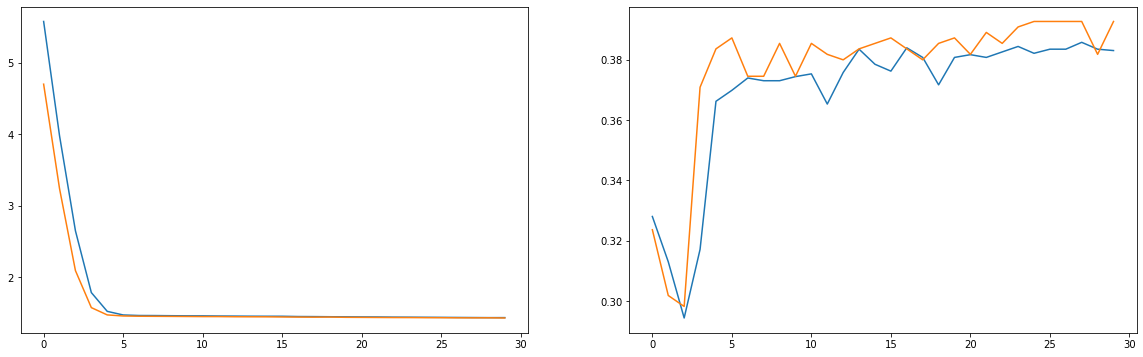

In [726]:
fig , axes = plt.subplots(1,2, figsize = (20,6))
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[1].plot(history.history['acc'])
axes[1].plot(history.history['val_acc'])

In [754]:
import pandas as pd

data = pd.read_csv('./data/all_data_final.csv', encoding='utf-8',index_col = 0)
data = data[data['연령'] >= 65]
def old_range(x):
    if 65 <= x <70:
        return 5
    elif 70 <= x <75:
        return 4
    elif 75 <= x <80:
        return 3
    elif 80 <= x <85:
        return 2
    elif 85 <= x :
        return 1
data_old_range = data.copy()
data_old_range['연령'] = data['연령'].apply(lambda x : old_range(x))



# 모델 분리
# data_old_range = data_old_range[columns]

feature_columns = data_old_range.columns.difference(["new_y"]) # new_y를 제외한 모든 행
y = data_old_range['new_y']
del data_old_range['new_y']
X = data_old_range

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#랜덤 포레스트 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators = 300 ,max_depth = 25, random_state = 42 ) # 시드값 고정
model1 = forest.fit(X_train, y_train) # 학습 진행

predict_train = model1.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = model1.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")



(2198, 59) (550, 59) (2198,) (550,)
Accuracy: 76.80 %
Accuracy: 41.27 %


In [755]:
data_old_range

,연령,시_1_군_0,동_1_읍면_0,성별,장애판정,가구월평균소득,여가문화생활_만족도,경제적_만족도,건강상태_만족도,전반적인삶_만족도,...,피처폰_보유,스마트폰_태블릿PC_보유,뉴스_날씨,미디어콘텐츠,SNS,앱 검색 및 설치,형제자매_존재,부모_존재,배우자_존재,동거자녀_존재
653,5,1.0,1.0,0.0,0.0,2.0,3.0,2.0,3.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
654,5,1.0,1.0,1.0,0.0,2.0,2.0,2.0,3.0,2.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
655,5,1.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0,3.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
656,5,1.0,1.0,1.0,0.0,4.0,3.0,3.0,3.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
657,5,1.0,1.0,0.0,0.0,3.0,2.0,3.0,3.0,3.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,4,1.0,1.0,0.0,0.0,3.0,4.0,4.0,3.0,6.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
8128,4,1.0,1.0,0.0,0.0,3.0,4.0,4.0,3.0,6.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
8135,4,1.0,1.0,0.0,0.0,3.0,4.0,4.0,3.0,6.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
8142,4,1.0,1.0,0.0,0.0,3.0,4.0,4.0,3.0,6.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [756]:
pop_data = ""
test = list(data.columns)
del test[-1]
test_acc =[]
for i in range(len(test)):
    pop_data = test[0]
    del test[0]
    data_test = data[test]
    X = data_test
    y = data['new_y']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,stratify = y)
    forest = RandomForestClassifier(n_estimators = 300 ,max_depth = 25, random_state = 42 ) # 시드값 고정
    model1 = forest.fit(X_train, y_train) # 학습 진행
    predict_train = model1.predict(X_train) # 평가 데이터 예측
    print(pop_data,'삭제')
    print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")
    predict_test = model1.predict(X_test) # 평가 데이터 예측
    print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")
    test.append(pop_data)
    test_acc.append(accuracy_score(y_test, predict_test) * 100)



연령 삭제
Accuracy: 76.34 %
Accuracy: 40.91 %
시_1_군_0 삭제
Accuracy: 76.80 %
Accuracy: 40.36 %
동_1_읍면_0 삭제
Accuracy: 75.84 %
Accuracy: 44.36 %
성별 삭제
Accuracy: 76.11 %
Accuracy: 43.82 %
장애판정 삭제
Accuracy: 76.98 %
Accuracy: 41.82 %
가구월평균소득 삭제
Accuracy: 76.98 %
Accuracy: 38.00 %
여가문화생활_만족도 삭제
Accuracy: 76.34 %
Accuracy: 42.55 %
경제적_만족도 삭제
Accuracy: 76.66 %
Accuracy: 41.82 %
건강상태_만족도 삭제
Accuracy: 76.71 %
Accuracy: 43.09 %
전반적인삶_만족도 삭제
Accuracy: 76.62 %
Accuracy: 42.55 %
직업_1 삭제
Accuracy: 76.62 %
Accuracy: 44.55 %
직업_11 삭제
Accuracy: 76.66 %
Accuracy: 40.18 %
직업_14 삭제
Accuracy: 76.89 %
Accuracy: 42.00 %
직업_15 삭제
Accuracy: 76.16 %
Accuracy: 42.00 %
직업_2 삭제
Accuracy: 77.16 %
Accuracy: 40.36 %
직업_3 삭제
Accuracy: 76.39 %
Accuracy: 42.55 %
직업_4 삭제
Accuracy: 76.39 %
Accuracy: 39.45 %
직업_5 삭제
Accuracy: 76.16 %
Accuracy: 45.09 %
직업_6 삭제
Accuracy: 76.43 %
Accuracy: 43.45 %
직업_7 삭제
Accuracy: 76.43 %
Accuracy: 43.82 %
직업_8 삭제
Accuracy: 75.89 %
Accuracy: 43.27 %
직업_9 삭제
Accuracy: 76.75 %
Accuracy: 44.36 %
광역시도_

array([ 3.60909091e-01,  9.06363636e-01, -3.09363636e+00, -2.54818182e+00,
       -5.48181818e-01,  3.27000000e+00, -1.27545455e+00, -5.48181818e-01,
       -1.82090909e+00, -1.27545455e+00, -3.27545455e+00,  1.08818182e+00,
       -7.30000000e-01, -7.30000000e-01,  9.06363636e-01, -1.27545455e+00,
        1.81545455e+00, -3.82090909e+00, -2.18454545e+00, -2.54818182e+00,
       -2.00272727e+00, -3.09363636e+00, -2.54818182e+00, -3.45727273e+00,
       -1.84545455e-01, -9.11818182e-01, -2.18454545e+00, -9.11818182e-01,
       -3.63909091e+00, -2.72727273e-03,  1.99727273e+00, -2.00272727e+00,
       -3.63909091e+00, -2.18454545e+00, -3.82090909e+00,  1.81545455e+00,
       -4.36636364e+00,  1.27000000e+00, -2.91181818e+00, -2.18454545e+00,
       -4.73000000e+00, -3.66363636e-01, -2.91181818e+00, -5.48181818e-01,
       -1.63909091e+00, -1.84545455e-01, -1.84545455e-01,  1.99727273e+00,
       -6.36636364e+00, -1.45727273e+00, -2.72727273e-03, -3.66363636e-01,
       -7.30000000e-01, -

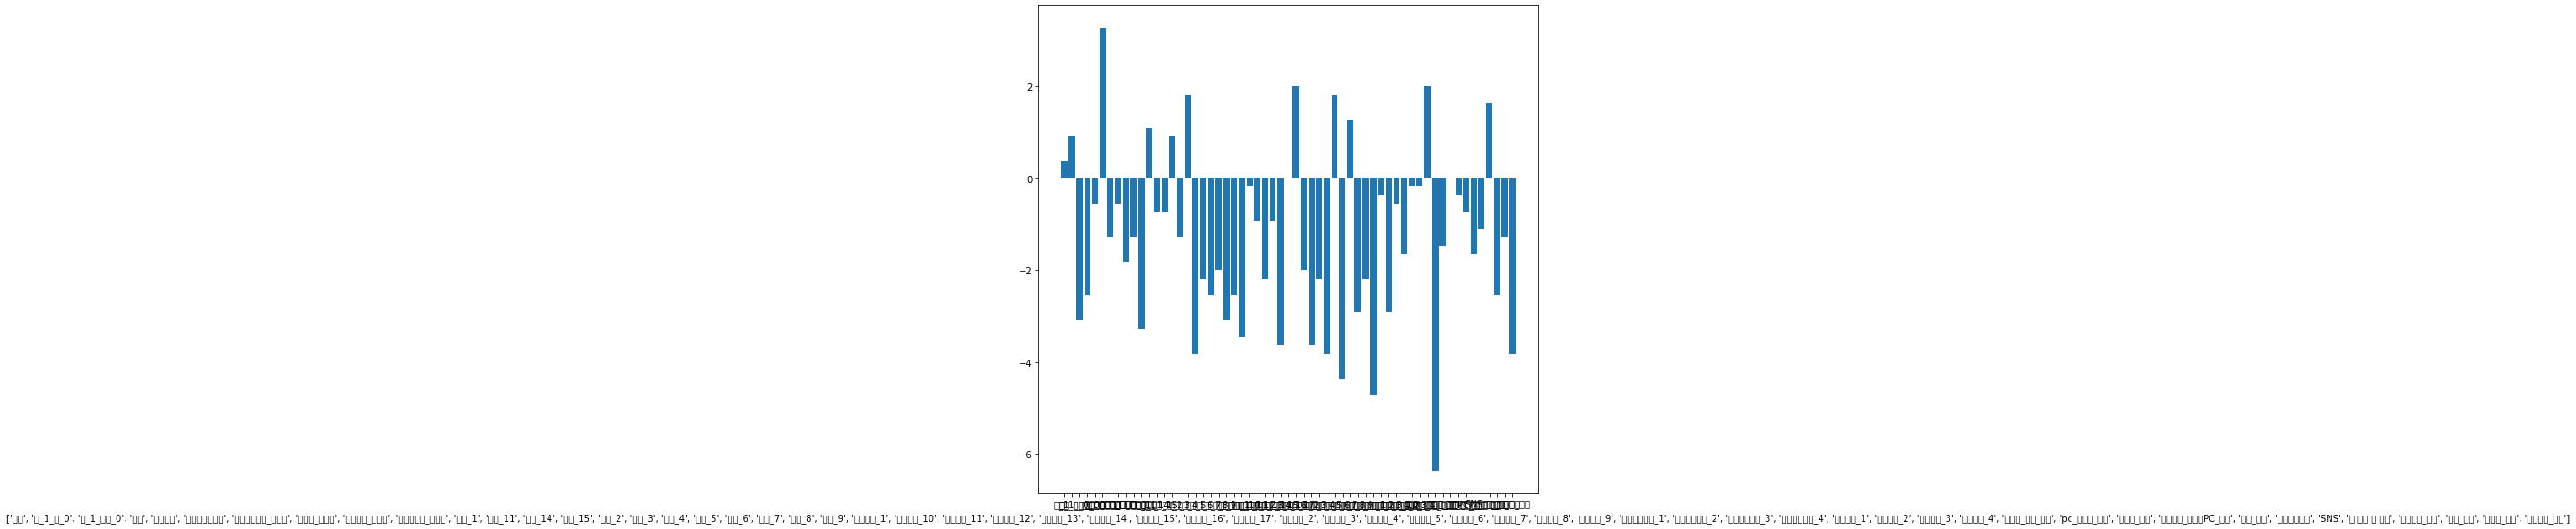

In [766]:
plt.figure(figsize=(10,10))
plt.xlabel(test)
test_acc =  np.array(test_acc)
test_acc = test_acc - 41.27 
plt.bar(test, test_acc)
test_acc

[('가구월평균소득', 3.270000000000003),
 ('광역시도_17', 1.9972727272727298),
 ('온라인_교육_여부', 1.9972727272727298),
 ('직업_4', 1.8154545454545499),
 ('광역시도_6', 1.8154545454545499),
 ('형제자매_존재', 1.63363636363637),
 ('광역시도_8', 1.2700000000000031),
 ('직업_11', 1.0881818181818232),
 ('시_1_군_0', 0.9063636363636434),
 ('직업_2', 0.9063636363636434),
 ('연령', 0.3609090909090895),
 ('광역시도_16', -0.002727272727270247),
 ('스마트폰_태블릿PC_보유', -0.002727272727270247),
 ('광역시도_11', -0.18454545454545013),
 ('최종학력_3', -0.18454545454545013),
 ('최종학력_4', -0.18454545454545013),
 ('가구거주형태_3', -0.3663636363636371),
 ('뉴스_날씨', -0.3663636363636371),
 ('장애판정', -0.5481818181818099),
 ('경제적_만족도', -0.5481818181818099),
 ('최종학력_1', -0.5481818181818099),
 ('직업_14', -0.7299999999999969),
 ('직업_15', -0.7299999999999969),
 ('미디어콘텐츠', -0.7299999999999969),
 ('광역시도_12', -0.9118181818181768),
 ('광역시도_14', -0.9118181818181768),
 ('앱 검색 및 설치', -1.0936363636363637),
 ('여가문화생활_만족도', -1.2754545454545436),
 ('전반적인삶_만족도', -1.2754545454545436),
 ('직

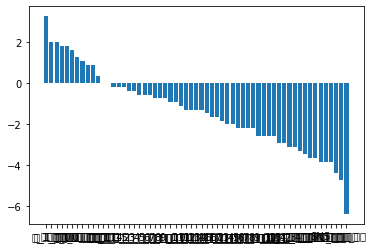

In [767]:
test_dic = {}
feature = list(zip(feat_labels, forest.feature_importances_))

feature = list(zip(test, test_acc))

for i in range(len(test)):
    test_dic[test[i]] = test_acc[i]
test_dic


# 학습한 모델의 피쳐 중요도 그래프로 살펴봅니다
importances = np.array(test_acc)
indices = np.argsort(importances)[::-1]
plt.bar(test, sorted(test_acc, reverse = True))

sorted(feature, key = lambda tup: tup[1], reverse = True)

In [773]:
list(range(20,1))

[]

['연령', '가구월평균소득', '전반적인삶_만족도', '건강상태_만족도', '경제적_만족도', '여가문화생활_만족도', 'pc_노트북_보유', '성별', '가구거주형태_2', '가구거주형태_1', '직업_11', '앱 검색 및 설치', '최종학력_3', '광역시도_9', '최종학력_2', '광역시도_1', '뉴스_날씨', '미디어콘텐츠', '배우자_존재', '직업_14', '동_1_읍면_0', 'SNS', '스마트폰_태블릿PC_보유', '최종학력_1', '가구거주형태_3', '피처폰_보유', '직업_5', '직업_9', '광역시도_2', '시_1_군_0', '직업_4', '광역시도_15', '광역시도_14', '광역시도_16', '광역시도_11', '광역시도_4', '온라인_교육_여부', '광역시도_13', '광역시도_6', '직업_7', '최종학력_4', '광역시도_5', '광역시도_3', '광역시도_12', '직업_6', '장애판정', '광역시도_10', '광역시도_17', '광역시도_7', '부모_존재', '직업_8', '광역시도_8', '가구거주형태_4', '직업_3', '직업_1', '형제자매_존재', '직업_15', '직업_2']


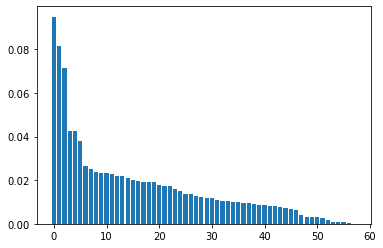

In [768]:
# 학습한 모델의 피쳐 중요도 그래프로 살펴봅니다
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])

#학습한 모델의 피쳐 중요도 출력합니다
feat_labels =X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
#forest.feature_importances_로 순서를 맞춰 보여줘라
sort_value = sorted(feature, key = lambda tup: tup[1], reverse = True)
feature_importance = []
for i in sort_value:
    feature_importance.append(i[0])
    
print(feature_importance)

In [781]:
best_columns = []
sort_lst=sorted(feature, key = lambda tup: tup[1],reverse = True)[:20]
for i in sort_lst:
    best_columns.append(i[0])
    
    

In [600]:
test_columns = [i[0] for i in sorted(feature, key = lambda tup: tup[1], reverse = True) ]
len(test_columns)

59

In [814]:
data = pd.read_csv('./data/all_data_final.csv', encoding='utf-8',index_col = 0)
data = data[data['연령'] >= 65]
def old_range(x):
    if 65 <= x <70:
        return 5
    elif 70 <= x <75:
        return 4
    elif 75 <= x <80:
        return 3
    elif 80 <= x <85:
        return 2
    elif 85 <= x :
        return 1
data_old_range = data.copy()
data_old_range['연령'] = data['연령'].apply(lambda x : old_range(x))
feature_columns = data_old_range.columns.difference(["new_y"]) # new_y를 제외한 모든 행
    
# 모델 분리
# columns = ['가구월평균소득', '전반적인삶_만족도', '연령', '건강상태_만족도', '경제적_만족도', 
#            '여가문화생활_만족도', '스마트폰_태블릿PC_보유', 'pc_노트북_보유', '직업_11', 
#            '가구거주형태_2', '앱 검색 및 설치',]
# X = data_old_range[columns]
X = data_old_range[best_columns]
y = data_old_range['new_y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42,stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2473, 20) (275, 20) (2473,) (275,)


In [815]:
best_columns

['연령',
 '가구월평균소득',
 '전반적인삶_만족도',
 '건강상태_만족도',
 '경제적_만족도',
 '여가문화생활_만족도',
 'pc_노트북_보유',
 '성별',
 '가구거주형태_2',
 '가구거주형태_1',
 '직업_11',
 '앱 검색 및 설치',
 '최종학력_3',
 '광역시도_9',
 '최종학력_2',
 '광역시도_1',
 '뉴스_날씨',
 '미디어콘텐츠',
 '배우자_존재',
 '직업_14']

In [816]:
#랜덤 포레스트 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators = 200 ,max_depth = 10, random_state = 42 ) # 시드값 고정
model1 = forest.fit(X_train, y_train) # 학습 진행

predict_train = model1.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = model1.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")

Accuracy: 68.66 %
Accuracy: 40.00 %


In [817]:
#XGboost
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(random_state = 0, n_estimator = 200, max_depth = 20, subsample = 0.8,gamma = 0.1).fit(X_train, y_train)

predict_train = xgb.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = xgb.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")


[17:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\wodud\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 74.81 %
Accuracy: 42.91 %


In [793]:
import numpy as np
from sklearn import neighbors,datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

clf = neighbors.KNeighborsClassifier(20)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred))

# k_range = range(1,100)
# k_scores = []
# from sklearn.metrics import cross_val_score
# for k in k_range:
#     knn = neighbors.KNeighborsClassifier(k)
#     scores = cross_val_score(knn, X, y, cv = 10, scoring = "accuracy") #cross_val_score
#     k_scores.append(scores.mean())

accuracy: 0.38727272727272727


In [794]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#비선형 SVM 분류모델을 학습하고 평가
svm = SVC(kernel = 'rbf', C=10.0, random_state = 0, gamma = 0.1)
svm.fit(X_train, y_train)
y_pred_ksvc = svm.predict(X_test)
print('Accuracy %.2f' % accuracy_score(y_test, y_pred_ksvc))

#Confusion Matrix
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred_ksvc)
print(confmat)

Accuracy 0.44
[[ 93  60  10   4  14]
 [ 61 108   6   7   7]
 [ 33  21  10   3   5]
 [ 11  17   2   5   1]
 [ 16  19   4   7  26]]


In [795]:
y_train.value_counts()

2.0    757
1.0    722
5.0    288
3.0    288
4.0    143
Name: new_y, dtype: int64

In [796]:
from catboost import CatBoostClassifier
import  sklearn.metrics as metrics
cb = CatBoostClassifier(silent=True, random_state = 0, n_estimators=100).fit(X_train, y_train)

print('train accuracy: ', metrics.accuracy_score(y_train, cb.predict(X_train)))
print('test accuracy: ', metrics.accuracy_score(y_test,cb.predict(X_test)))

train accuracy:  0.7179253867151957
test accuracy:  0.4127272727272727


In [797]:
X_train.shape

(2198, 20)

In [798]:
# 필요한 Library
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time 
import pandas as pd

data = pd.read_csv('./data/all_data_final.csv', encoding='utf-8',index_col = 0)
data = data[data['연령'] >= 65]
def old_range(x):
    if 65 <= x <70:
        return 5
    elif 70 <= x <75:
        return 4
    elif 75 <= x <80:
        return 3
    elif 80 <= x <85:
        return 2
    elif 85 <= x :
        return 1
data_old_range = data.copy()
data_old_range['연령'] = data['연령'].apply(lambda x : old_range(x))



# 모델 분리
# data_old_range = data_old_range[columns]

feature_columns = data_old_range.columns.difference(["new_y"]) # new_y를 제외한 모든 행
y = data_old_range['new_y']
del data_old_range['new_y']
X = data_old_range

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2198, 59) (550, 59) (2198,) (550,)


In [621]:
model = sm.Logit(y_train, X_train)
results = model.fit(method = "newton") 

ValueError: endog must be in the unit interval.

3804    5.0
4998    1.0
1206    5.0
2824    5.0
1088    1.0
       ... 
3976    5.0
3586    5.0
7722    2.0
5104    2.0
1040    5.0
Name: new_y, Length: 2431, dtype: float64

In [748]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)

0.44727272727272727

In [636]:
data = pd.read_csv('./data/all_data_final.csv', encoding='utf-8',index_col = 0)
data = data[data['연령'] >= 65]
def old_range(x):
    if 65 <= x <70:
        return 5
    elif 70 <= x <75:
        return 4
    elif 75 <= x <80:
        return 3
    elif 80 <= x <85:
        return 2
    elif 85 <= x :
        return 1
data_old_range = data.copy()
data_old_range['연령'] = data['연령'].apply(lambda x : old_range(x))



In [637]:
import statsmodels.formula.api as smf
# Lottery here is Y, the fields from X are right of ~

mod = smf.ols(formula='new_y ~ 연령+시_1_군_0+동_1_읍면_0+성별+장애판정+가구월평균소득+여가문화생활_만족도+경제적_만족도+건강상태_만족도+전반적인삶_만족도+직업_1+직업_11+직업_14+직업_15+직업_2+직업_3+직업_4+직업_5+직업_6+직업_7+직업_8+직업_9+광역시도_1+광역시도_10+광역시도_11+광역시도_12+광역시도_13+광역시도_14+광역시도_15+광역시도_16+광역시도_17+광역시도_2+광역시도_3+광역시도_4+광역시도_5+광역시도_6+광역시도_7+광역시도_8+광역시도_9+가구거주형태_1+가구거주형태_2+가구거주형태_3+가구거주형태_4+최종학력_1+최종학력_2+최종학력_3+최종학력_4+온라인_교육_여부+pc_노트북_보유+피처폰_보유+스마트폰_태블릿PC_보유+뉴스_날씨+미디어콘텐츠+SNS+형제자매_존재+부모_존재+배우자_존재+동거자녀_존재', data=data_old_range) 
res = mod.fit()


In [638]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  new_y   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     9.888
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.88e-71
Time:                        14:58:41   Log-Likelihood:                -5468.7
No. Observations:                3039   AIC:                         1.105e+04
Df Residuals:                    2985   BIC:                         1.137e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.7311      0.183     14.898

In [650]:
import statsmodels.api as sm
import pandas as pd 
  

   
# building the model and fitting the data
X= sm.add_constant(X_train)
model = sm.OLS(y_train,X)
result = model.fit()

In [653]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  new_y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     8.037
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           7.52e-55
Time:                        15:14:03   Log-Likelihood:                -4366.9
No. Observations:                2431   AIC:                             8844.
Df Residuals:                    2376   BIC:                             9163.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9392      0.212     13.879      0.000       2.524       3.355
연령               -0.3986      0.040     -9.913      0.000      -0.477      -0.320
시_1_군_0           0.2171      0.146      1.489      0.137      -0.069       0.503
동_1_읍면_0         -0.0635      0.114     -0.557      0.577      -0.287       0.160
성별               -0.2136      0.098     -2.184      0.029      -0.405      -0.022
장애판정             -0.1187      0.173     -0.685      0.493      -0.458       0.221
가구월평균소득           0.0078      0.018      0.440      0.660      -0.027       0.042
여가문화생활_만족도        0.0880      0.063      1.397      0.162      -0.035       0.211
경제적_만족도           0.0170      0.053      0.318      0.751      -0.088       0.122
건강상태_만족도         -0.0342      0.052     -0.660      0.509      -0.136       0.067
전반적인삶_만족도        -0.0151      0.030     -0.503      0.615      -0.074       0.044
직업_1              1.1597      1.362      0.852      0.394      -1.511       3.830
직업_11            -0.1097      0.176     -0.625      0.532      -0.454       0.235
직업_14             0.1545      0.170      0.911      0.362      -0.178       0.487
직업_15            -1.2790      0.573     -2.234      0.026      -2.402      -0.156
직업_2           -1.55e-15   1.71e-15     -0.908      0.364    -4.9e-15     1.8e-15
직업_3              2.6260      0.701      3.747      0.000       1.252       4.000
직업_4              0.0191      0.191      0.100      0.920      -0.356       0.395
직업_5              0.0584      0.180      0.324      0.746      -0.294       0.411
직업_6             -0.0634      0.207     -0.306      0.760      -0.470       0.343
직업_7              0.1034      0.203      0.510      0.610      -0.294       0.501
직업_8              0.0263      0.283      0.093      0.926      -0.528       0.581
직업_9              0.2438      0.186      1.312      0.190      -0.121       0.608
광역시도_1            0.0048      0.091      0.053      0.958      -0.174       0.184
광역시도_10           0.5308      0.180      2.956      0.003       0.179       0.883
광역시도_11          -0.1429      0.137     -1.040      0.298      -0.412       0.126
광역시도_12           0.4534      0.148      3.057      0.002       0.163       0.744
광역시도_13           0.0851      0.142      0.600      0.549      -0.193       0.363
광역시도_14          -0.0678      0.138     -0.490      0.624      -0.339       0.203
광역시도_15           0.4071      0.146      2.791      0.005       0.121       0.693
광역시도_16           0.3056      0.134      2.281      0.023       0.043       0.568
광역시도_17           0.3785      0.252      1.500      0.134      -0.116       0.873
광역시도_2            0.1279      0.120      1.064      0.287      -0.108       0.363
광역시도_3            0.2078      0.148      1.403      0.161      -0.083       0.498
광역시도_4            0.5038      0.137      3.684   

In [641]:
y_train

3804    5.0
4998    1.0
1206    5.0
2824    5.0
1088    1.0
       ... 
3976    5.0
3586    5.0
7722    2.0
5104    2.0
1040    5.0
Name: new_y, Length: 2431, dtype: float64

In [749]:
!pip install seqeval

  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16170 sha256=aea7f3a7386cede7777cd42a6254b1c7c20d9e97d8ee1734ef6443a1b293c031
  Stored in directory: c:\users\wodud\appdata\local\pip\cache\wheels\ad\5c\ba\05fa33fa5855777b7d686e843ec07452f22a66a138e290e732
Successfully built seqeval


In [750]:
from seqeval.metrics import classification_report

print(classification_report([y_test], [y_pred]))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().